## MCEq-1D

In [13]:
# https://mceq.readthedocs.io/en/latest/tutorial.html#tutorial

In [2]:
from MCEq.core import config, MCEqRun
import crflux.models as crf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import mplcyberpunk as mcp
#plt.style.use("cyberpunk")
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['axes.labelcolor'] = 'black'
#plt.rcParams['xtick.color'] = 'black'
#plt.rcParams['ytick.color'] = 'black'

#colors = [
    #'#08F7FE',  # teal/cyan
    #'#FE53BB',  # pink
    #'#F5D300',  # yellow
    #'#00ff41',  # matrix green
#]

In [4]:

def flux(theta, int_model = 'SIBYLL23C', numu_only = False):
    
    
    # Initalize MCEq by creating the user interface object MCEqRun
    mceq = MCEqRun(

        # Hadronic interaction model
        interaction_model= int_model,    # The default is high-energy

        # cosmic ray flux at the top of the atmosphere (primary flux)
        primary_model = (crf.HillasGaisser2012, 'H3a'),

        # zenith angle
        theta_deg = theta
    )
    
    mceq.set_theta_deg(theta*180/np.pi) # in degrees
    mceq.set_interaction_model(int_model)
    #mceq.set_primary_model(crf.HillasGaisser2012, 'H3a')
    
    # Solve the equation system
    mceq.solve()

    # Obtain the result
    # Multiply fluxes be E**mag to resolve the features of the steep spectrum
    mag = 3
    x = mceq.e_grid
    
    if numu_only == False:
        muon_flux = (mceq.get_solution('mu+', mag) +
                     mceq.get_solution('mu-', mag))
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        nue_flux = (mceq.get_solution('nue', mag) +
                    mceq.get_solution('antinue', mag))
        return muon_flux, numu_flux, nue_flux, x

    else:
        numu_flux = (mceq.get_solution('numu', mag) +
                     mceq.get_solution('antinumu', mag))
        return numu_flux, x

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC


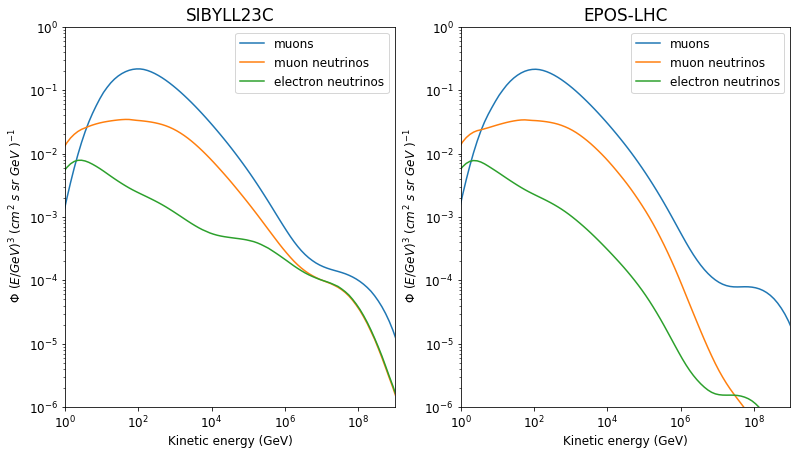

In [5]:
# Plots for 2 different interaction models
interaction_model = ['SIBYLL23C', 'EPOS-LHC']
r_theta = r'$\theta$'
r_numu = r'$\nu_{\mu}$'

fig, axs = plt.subplots(1,2, figsize=(13, 7), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(len(interaction_model)):
    muon_flux_0, numu_flux_0, nue_flux_0, x = flux(0, interaction_model[i])
    
    axs[i].loglog(x, muon_flux_0, label='muons')
    axs[i].loglog(x, numu_flux_0, label='muon neutrinos')
    axs[i].loglog(x, nue_flux_0, label='electron neutrinos')

    axs[i].set_xlim(1., 1e9)
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylim(1e-6, 1.)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ $(E/GeV)^3$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(interaction_model[i])
    axs[i].legend(fontsize=12)
    

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

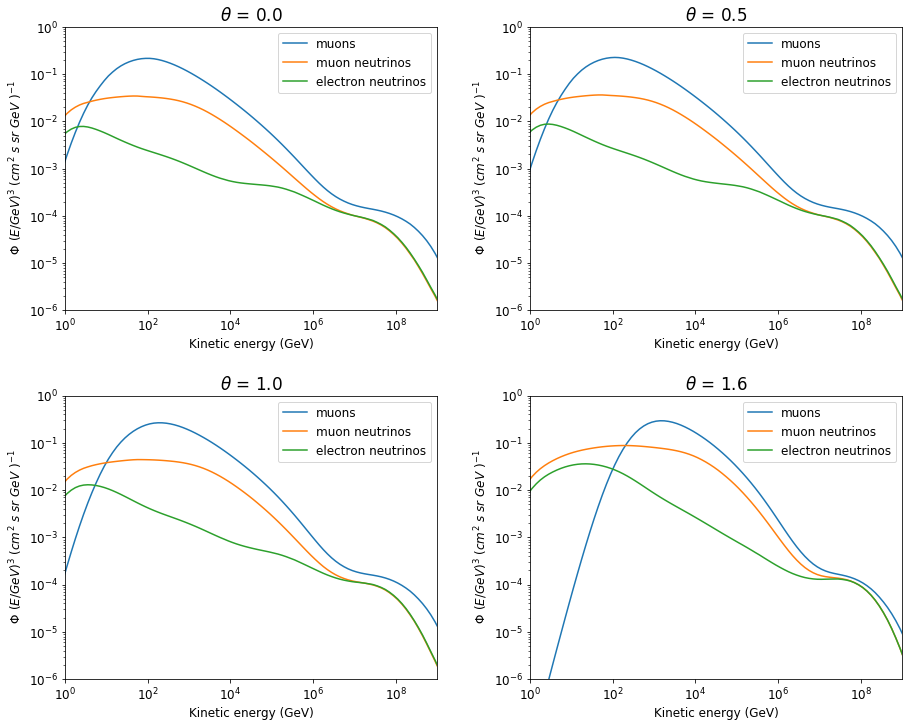

In [6]:
# Plots for 4 different theta
theta = np.linspace(0, np.pi/2, 4)

fig, axs = plt.subplots(2,2, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace=.25)
axs = axs.ravel()

for i in range(len(theta)):
    muon_flux, numu_flux, nue_flux, x = flux(theta[i])
    
    axs[i].loglog(x, muon_flux, label='muons')
    axs[i].loglog(x, numu_flux, label='muon neutrinos')
    axs[i].loglog(x, nue_flux, label='electron neutrinos')

    axs[i].set_xlim(1., 1e9)
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylim(1e-6, 1.)
    #(E/\text{GeV})^3\,\Phi$ (GeV cm$^{-2}$\,$s$^{-1}\,$sr$^{-1}$) (GeV)
    axs[i].set_ylabel(r' $\Phi$ $(E/GeV)^3$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].set_title(f'{r_theta} = {np.round(theta[i],1)}')
    axs[i].legend(fontsize=12)

#fig.savefig('3particles_4angles.png')

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

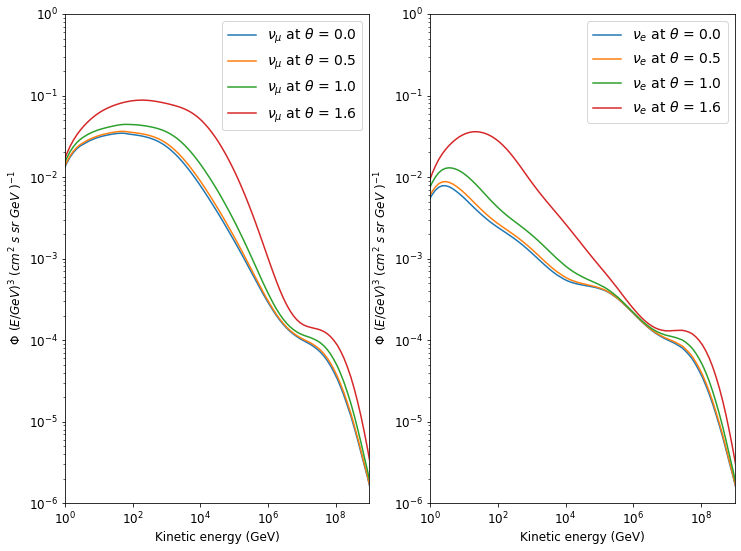

In [7]:
theta = np.linspace(0, np.pi/2, 4)

fig, axs = plt.subplots(1, 2, figsize=(12,9))
axs = axs.ravel()
r_nue = r'$\nu_e$'

for t in theta:
    muon_flux, numu_flux, nue_flux, x = flux(t)
    axs[0].loglog(x, numu_flux, label=f'{r_numu} at {r_theta} = {np.round(t,1)}')
    axs[1].loglog(x, nue_flux, label=f'{r_nue} at {r_theta} = {np.round(t,1)}')
    
for i in range(2):
    axs[i].set_xlim(1., 1e9)
    axs[i].set_xlabel('Kinetic energy (GeV)', fontsize=12)
    axs[i].set_ylim(1e-6, 1.)
    axs[i].set_ylabel(r' $\Phi$ $(E/GeV)^3$ ($cm^2$ $s$ $sr$ $GeV$ $)^{-1}$', fontsize=12)
    axs[i].legend()

#fig.savefig('numu_nue_4angles.png')

In [227]:
n_theta = 50
cos_theta_matrix = np.linspace(0, 1, n_theta)
cos_theta_matrix[0] += 10**(-7)
theta_matrix = np.arccos(cos_theta_matrix)

flux_matrix = np.zeros((n_theta,121))

for t in range(len(theta_matrix)):
    numu_flux, x_matrix = flux(theta_matrix[t], numu_only = True)
    flux_matrix[t] = numu_flux

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_interaction_model(): SIBYLL

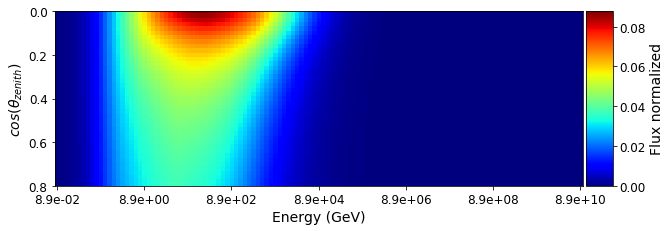

In [228]:
from matplotlib import cm, colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


energy_strings = [str("{:.1e}".format(x)) for x in x_matrix]
cos_theta_strings = [str(np.round(t, 1)) for t in cos_theta_matrix]
yticks = np.arange(0, 50, 10)
xticks = np.arange(0, 130, 20)
ylabels = []
xlabels = []

for i in range(len(yticks)):
    label_y = cos_theta_strings[yticks[i]]
    ylabels.append(label_y)
    
for i in range(len(xticks)):
    label_x = energy_strings[xticks[i]]
    xlabels.append(label_x)

fig, ax = plt.subplots(figsize=(10,7))

im = ax.imshow(flux_matrix, cmap='jet') #norm=colors.LogNorm(),
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = plt.colorbar(im, cax=cax)
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'$cos(\theta_{zenith})$')
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
cbar.set_label('Flux normalized');